In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the dataset
df= pd.read_csv('TitanicD.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop('Cabin', axis=1, inplace=True)
# Filling null values in the 'Age' column with 18
df['Age'].fillna(df['Age'].median(),inplace=True)

In [9]:

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
df.fillna('S',inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

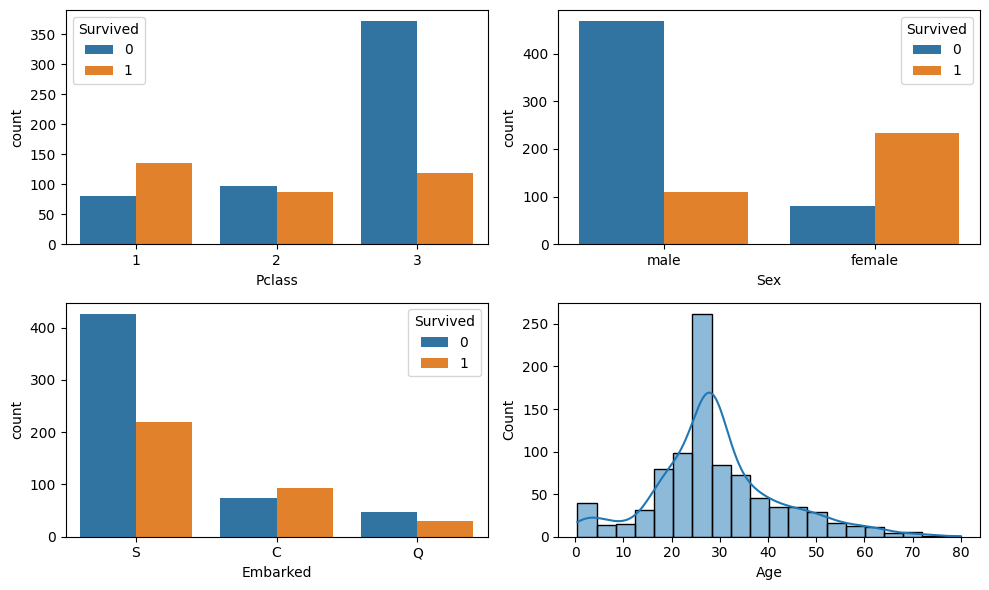

In [13]:
plt.figure(figsize=(10, 6))

# Plot showing survival based on Pclass
plt.subplot(2, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=df)

# Plot showing survival based on gender
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=df)

# Plot showing survival based on Embarked location
plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', hue='Survived', data=df)

# Plot showing age distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Age'], bins=20, kde=True)

plt.tight_layout()
plt.show()

In [14]:
# Convert categorical variables into dummy/indicator variables
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [15]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
df = pd.concat([df, sex, embark], axis=1)

In [16]:
# Train-test split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [17]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=33)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=33)

In [18]:
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.8435754189944135

Confusion Matrix:
 [[97 10]
 [18 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.84      0.75      0.79        72

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [19]:
#survival probability predictions with user input
sample_passenger = [[3, 55, 1, 0, 7.25, 1, 0, 0, 1]] #features-[Pclass, Age, SibSp, Parch, Fare, Male,Female, Q, S]

likelihood_of_survival = model.predict_proba(sample_passenger)
print("\nLikelihood of Survival for the Passenger:", likelihood_of_survival)
print("\nNot Survived probabity:",likelihood_of_survival[0,0])
print("\nSurvived probability:",likelihood_of_survival[0,1])


Likelihood of Survival for the Passenger: [[0.25 0.75]]

Not Survived probabity: 0.25

Survived probability: 0.75


In [20]:
sample_passenger = [[1, 55, 1, 0, 15.65, 0, 1, 1, 0]] #features-[Pclass, Age, SibSp, Parch, Fare, Male,Female, Q, S]
likelihood_of_survival = model.predict_proba(sample_passenger)
print("\nLikelihood of Survival for the Passenger:", likelihood_of_survival)
print("\nNot Survived probabity:",likelihood_of_survival[0,0])
print("\nSurvived probability:",likelihood_of_survival[0,1])


Likelihood of Survival for the Passenger: [[0.45 0.55]]

Not Survived probabity: 0.45

Survived probability: 0.55
